In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./archive/character-deaths.csv')
data

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [3]:
data.drop(['Book of Death', 'Death Chapter'], axis=1, inplace = True)
data

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,73.0,1,0,0,0,1,0,0


In [4]:
# 把所有 Non-NaN 的值轉成 1
data['Death Year'] = data['Death Year'].apply(lambda x: 1 if not pd.isnull(x) else np.nan)

# 把所有 NaN 的值轉成 0 
data['Death Year'] = data['Death Year'].fillna(0, downcast='int')

data

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,1,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,1,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,0,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,1,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,1,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,1,73.0,1,0,0,0,1,0,0


In [5]:
# Dummy feature
df2 = pd.get_dummies(data['Allegiances'])
data.drop(['Allegiances'], axis=1, inplace = True)
data.join(df2)

,Name,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,Addam Marbrand,0,56.0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),1,49.0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,0,5.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,1,20.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,0,NaN,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,0,21.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
913,Yurkhaz zo Yunzak,1,47.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
914,Yezzan Zo Qaggaz,1,25.0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
915,Torwynd the Tame,1,73.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(data.join(df2), random_state=777, train_size=0.75)

In [8]:
train

,Name,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
438,Khrazz,1,11.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
670,Rafford,0,19.0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
785,Symon Stripeback,0,70.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
567,Morros Slynt,0,2.0,1,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
875,Wendel Manderly,1,55.0,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Bearded Ben,0,NaN,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
599,Obara Sand,0,2.0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
571,Mudge (miller),1,34.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
815,Tom of Sevenstreams,0,13.0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
test

,Name,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
135,Chiggen,1,31.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
808,Timeon,1,21.0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
79,Belwas,0,63.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
275,Gerald Gower,0,54.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
906,Yohn Farwynd,0,19.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Softfoot,1,0.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
323,Haldon,0,8.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
802,Thoren Smallwood,1,6.0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
807,Tim Tangletongue,0,69.0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
from sklearn import tree
from sklearn import metrics

In [11]:
# split data for label
y_train = train['Death Year']
y_test = test['Death Year']
train.drop(['Death Year'], axis = 1, inplace = True)
test.drop(['Death Year'], axis = 1, inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Process columns, apply LabelEncoder to categorical features
lbl = LabelEncoder()
lbl.fit(list(train['Name'].values)) 
train['Name'] = lbl.transform(list(train['Name'].values))

lbl.fit(list(test['Name'].values)) 
test['Name'] = lbl.transform(list(test['Name'].values))

In [13]:
# Find out the NaN record then convert it to zero
train[train.isnull().values==True] # It would be column 'Book Intro Chapter'
train['Book Intro Chapter'] = train['Book Intro Chapter'].fillna(0, downcast='int')

test[test.isnull().values==True] # It would be column 'Book Intro Chapter'
test['Book Intro Chapter'] = test['Book Intro Chapter'].fillna(0, downcast='int')

In [14]:
# Fit the model
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(train, y_train)

In [15]:
y_pred = clf.predict(test)

Accuracy: 0.6826086956521739
Precision: 0.5384615384615384
Recall: 0.6125


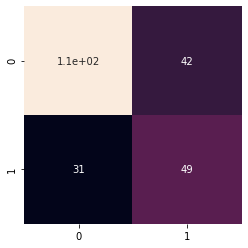

In [16]:
import seaborn as sns 

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


mat = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(mat, square = True, annot = True, cbar = False)

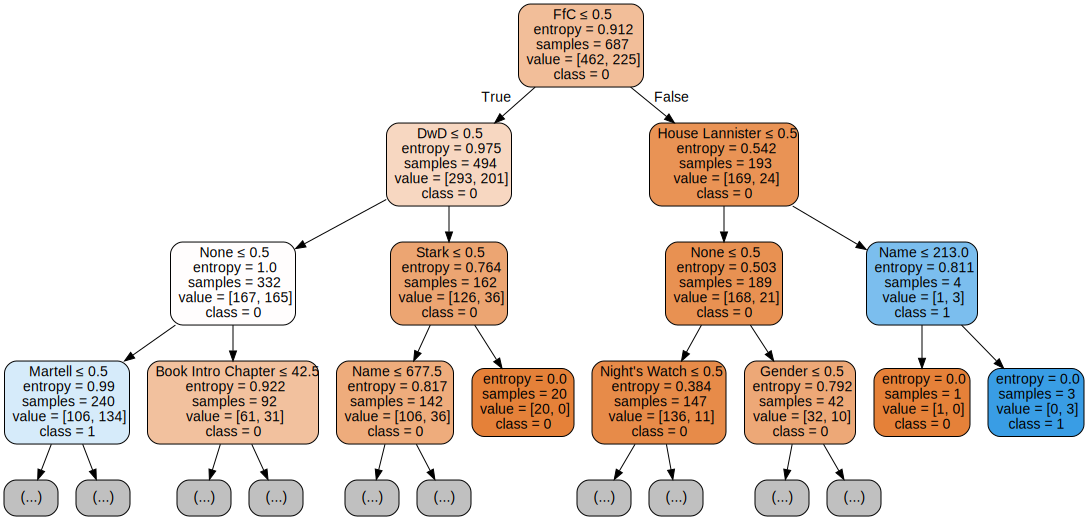

In [17]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3, feature_names=train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph 
